# 3D Map

While representing the configuration space in 3 dimensions is not entirely practical, it's fun (and useful) to visualize things in 3D.

This notebook implements `create_voxmap` function such that a 3D grid is returned where cells containing an obstacle are set to `True`. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

plt.rcParams['figure.figsize'] = 14, 14

In [2]:
# Reeding the Obstacle data file
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-305.  -435.    85.5    5.     5.    85.5]
 [-295.  -435.    85.5    5.     5.    85.5]
 [-285.  -435.    85.5    5.     5.    85.5]
 ...
 [ 435.   465.     8.     5.     5.     8. ]
 [ 445.   465.     8.     5.     5.     8. ]
 [ 455.   465.     8.     5.     5.     8. ]]


In [3]:
def create_voxmap(data, voxel_size=5):
    """
    Returns a grid representation of a 3D configuration space
    based on given obstacle data.
    
    The `voxel_size` argument sets the resolution of the voxel map. 
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.amin(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.amax(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.amin(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.amax(data[:, 1] + data[:, 4]))

    alt_max = np.ceil(np.amax(data[:, 2] + data[:, 5]))
    
    # given the minimum and maximum coordinates we can calculate the size of the grid.
    north_size = int(np.ceil((north_max - north_min))) // voxel_size
    east_size = int(np.ceil((east_max - east_min))) // voxel_size
    alt_size = int(alt_max) // voxel_size
    
    # Initialize an empty voxel map
    voxmap = np.zeros((north_size, east_size, alt_size), dtype=np.bool)

    # Populate the voxel with obstacles
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        obstacle = [int(north - d_north - north_min) // voxel_size,
                    int(north + d_north - north_min) // voxel_size,
                    int(east - d_east - east_min) // voxel_size,
                    int(east + d_east - east_min) // voxel_size,
                    int(alt - d_alt) // voxel_size,
                    int(alt + d_alt) // voxel_size]
        
        voxmap[obstacle[0]:obstacle[1], obstacle[2]:obstacle[3], obstacle[4]:obstacle[5]] = True    
    
    return voxmap

(202, 227, 53)


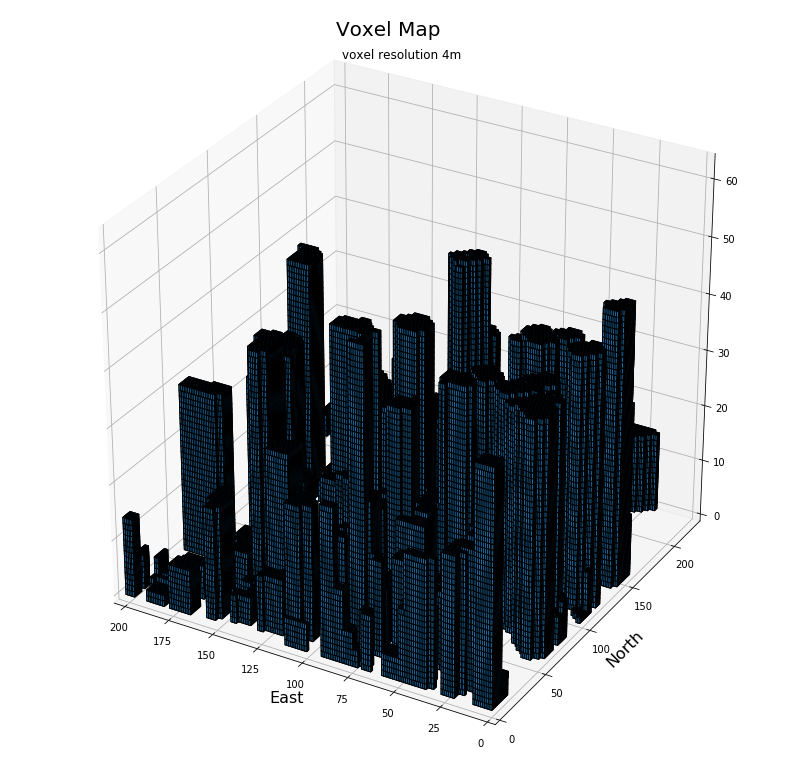

In [11]:
# Create a Voxel Map
voxel_size = 4
voxmap = create_voxmap(data, voxel_size)
print(voxmap.shape)

# Plotting
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxmap, edgecolor='k')
ax.set_xlim(voxmap.shape[0], 0)
ax.set_ylim(0, voxmap.shape[1])
ax.set_zlim(0, voxmap.shape[2]+10)

plt.xlabel('East', fontsize=16)
plt.ylabel('North', fontsize=16)
plt.suptitle('Voxel Map', fontsize=20, x=0.5, y=0.87)
plt.title('voxel resolution {}m'.format(voxel_size), fontsize=12, x=0.5, y=1.01)

plt.show()